In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('ML.csv')

In [5]:
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [9]:
df.dtypes

typeofaction             object
sourceid                  int64
destinationid             int64
amountofmoney             int64
date             datetime64[ns]
isfraud                   int64
typeoffraud              object
hour                      int32
day_of_week               int32
month                     int32
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

print("NaT values:", df['date'].isna().sum())

df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

print(df)

NaT values: 0
     typeofaction  sourceid  destinationid  amountofmoney                date  \
0         cash-in     30105          28942         494528 2019-07-19 14:40:00   
1         cash-in     30105           8692         494528 2019-05-17 14:57:00   
2         cash-in     30105          60094         494528 2019-07-20 13:20:00   
3         cash-in     30105          20575         494528 2019-07-03 14:15:00   
4         cash-in     30105          45938         494528 2019-05-26 10:40:00   
...           ...       ...            ...            ...                 ...   
2335     transfer     14945          43793         106907 2019-03-29 14:53:00   
2336     transfer      9532          43793         106907 2019-04-13 13:19:00   
2337     transfer     27332          43793         106907 2019-05-10 09:34:00   
2338     transfer     32685          43793         106907 2019-07-08 12:20:00   
2339     transfer     26390          43793         106907 2019-03-25 13:52:00   

      isfraud

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
X_test

array([[ 1.12890531,  1.22852546, -0.86617842,  0.69530545,  1.50982178,
        -1.16985074],
       [-0.01623163,  1.30154148,  0.71796837,  1.57626099,  1.50982178,
         0.88967332],
       [ 0.75963928, -1.60518298,  0.66078203,  1.57626099, -1.00296838,
        -0.48334272],
       ...,
       [-0.70471949, -1.22892841,  1.81424617, -0.18565009, -1.50552641,
         0.88967332],
       [-1.55618046, -0.30144458, -0.93874793,  1.13578322,  0.00214768,
        -1.85635876],
       [-1.46491147,  0.90279908, -0.71759225, -1.06660563, -1.00296838,
         0.88967332]])

In [19]:
features = df[['sourceid', 'destinationid', 'amountofmoney', 'hour', 'day_of_week', 'month']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [21]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = model.fit_predict(scaled_features)



Detected Anomalies:
     typeofaction  sourceid  destinationid  amountofmoney                date  \
63        cash-in     92735          17423         306537 2019-02-25 09:06:00   
64        cash-in     92735          44570         306537 2019-07-01 15:24:00   
70        cash-in      1615           8552         639230 2019-03-05 15:25:00   
78        cash-in      1615           3335         639230 2019-07-04 15:30:00   
94        cash-in      4161          94376         249082 2019-03-03 08:06:00   
...           ...       ...            ...            ...                 ...   
2288     transfer      4622           7538        3503270 2019-07-15 13:58:00   
2291     transfer     17401          13760        4369196 2019-03-25 08:52:00   
2302     transfer     33564           6678        1180054 2019-07-15 08:41:00   
2315     transfer     64550          43793         106906 2019-07-08 08:15:00   
2321     transfer     77458          43793         106906 2019-02-24 08:31:00   

      i

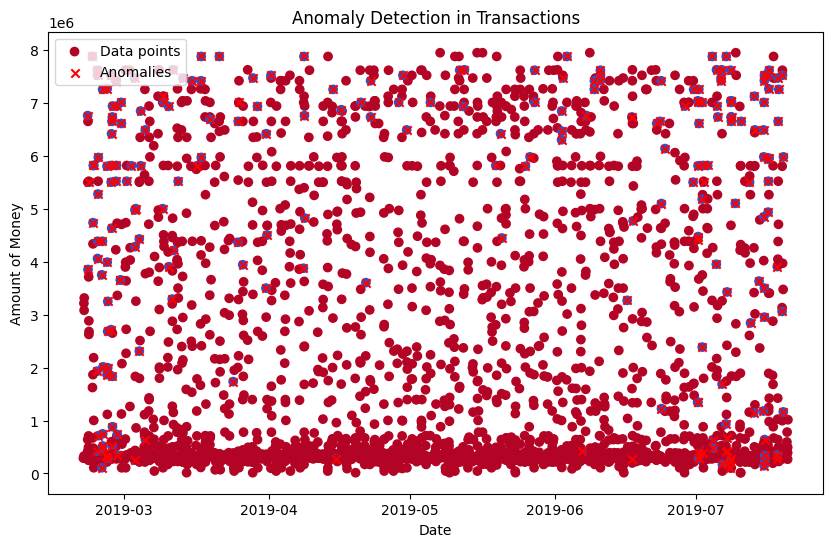

In [22]:

import matplotlib.pyplot as plt

anomalies = df[df['anomaly'] == -1]
print("Detected Anomalies:")
print(anomalies)

# Optional: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['amountofmoney'], c=df['anomaly'], cmap='coolwarm', label='Data points')
plt.scatter(anomalies['date'], anomalies['amountofmoney'], color='red', label='Anomalies', marker='x')
plt.xlabel('Date')
plt.ylabel('Amount of Money')
plt.title('Anomaly Detection in Transactions')
plt.legend()
plt.show()


In [24]:
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud,hour,day_of_week,month,anomaly
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1,14,4,7,1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1,14,4,5,1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1,13,5,7,1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1,14,2,7,1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1,10,6,5,1


In [25]:
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud,hour,day_of_week,month,anomaly
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1,14,4,7,1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1,14,4,5,1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1,13,5,7,1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1,14,2,7,1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1,10,6,5,1


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [29]:
df2 = pd.read_csv('ML.csv')

In [30]:
df2['date'] = pd.to_datetime(df2['date'])
df2['hour'] = df2['date'].dt.hour
df2['day_of_week'] = df2['date'].dt.dayofweek
df2['month'] = df2['date'].dt.month

In [31]:
labelencoder = LabelEncoder()

df2['typeofaction'] = labelencoder.fit_transform(df2['typeofaction'])
df2['typeoffraud'] = labelencoder.fit_transform(df2['typeoffraud'])

In [33]:
X = df2[['typeofaction', 'sourceid', 'destinationid', 'amountofmoney', 'hour', 'day_of_week', 'month']]
y = df2['isfraud'] 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [36]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Model Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Model Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}


In [41]:
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score , r2_score , precision_score
print("Accuracy" , accuracy_score(y_pred , y_test))
print("R2" , r2_score(y_pred , y_test))
print("Precision" , precision_score(y_pred , y_test))


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

import joblib
joblib.dump(best_model, 'fraud_detection_model_xgb.pkl')
print("Model saved to fraud_detection_model_xgb.pkl")

Confusion Matrix:
[[172  16]
 [  5 275]]
Accuracy 0.9551282051282052
R2 0.8091909837497815
Precision 0.9821428571428571

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       188
           1       0.95      0.98      0.96       280

    accuracy                           0.96       468
   macro avg       0.96      0.95      0.95       468
weighted avg       0.96      0.96      0.95       468

Model saved to fraud_detection_model_xgb.pkl
